### Hypothesis Generation

We seek to test our hypothesis that the price of bitcoin will correlate with the sentiment found in its online communities, with the idea that sentiment has an affect on price.

### Creating our Datasets

Our sentiment dataset will be generated by pulling titles from Reddit posts across a given time span (roughly a few years), then analyzing this text with TextBlob, a text-processing API. 

(note: actual dataset creation was done using python scripts within pycharm. code for those is provided if interested)

### An example of text extraction:

In [1]:
from selenium import webdriver

In [2]:
url = "https://web.archive.org/web/" + "20180101" + "/reddit.com/" + "r/bitcoin"
driver = webdriver.Firefox()
driver.get(url)
sitetable = driver.find_element_by_id("siteTable")
posts = sitetable.find_elements_by_tag_name("div")
titles = []
for post in posts:
    if (len(post.find_elements_by_class_name("title")) > 0):
        title = post.find_element_by_class_name("title").text
        titles.append(title)
titles = set(titles)
driver.quit()

print(titles)

{'Looks like Etsy allows Bitcoin unofficially (self.Bitcoin)', 'x How likely is it that Bitcoin will become obsolete? Andreas M. Antonopoulos (youtube.com)', "Day 6: I will post this guide regularly until available solutions like SegWit & order batching are mass adopted, the mempool is empty once again, and tx fees are low. Refer a friend to SegWit today. There's no $10 referral offer, but you'll both get lower fees and help strengthen the BTC protocol (self.Bitcoin)", 'Year of ⚡️ (self.Bitcoin)', "It's Official: First Bitcoin Lightning Network Payment Completed (dailyhodl.com)", 'And the title for 2017 Drama Queen goes to... Roger Ver. Gz! (twitter.com)', '2018 Will Be Like This (i.redd.it)', '24 months of HODLing. This is a PSA for the average investor. Don’t trade. Be patient, get rich slow. (i.redd.it)', 'Doing some shopping here in Tokyo, Japan 😍 (i.redd.it)', "I just witnessed the future of Bitcoin and it's glorious (youtube.com)", 'Started 2018 by running a full node - long live

The included python script writes these titles to a .csv as a pandas dataframe. 

We will read from this csv now to show how we create a dataset for sentiment, using data for most of 2018.

In [3]:
import pandas as pd

In [4]:
rawtextdata = pd.read_csv(filepath_or_buffer='redditdata.csv', infer_datetime_format=True)
rawtextdata = rawtextdata.set_index(rawtextdata.columns[0])
rawtextdata

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2018-01-05,"Bitcoin Price Shoots Past $16,400 Again on the...",Hodlers waking up after it hit green (i.imgur....,Andreas Antonopoulos' depiction of the day he ...,I'm donating 25 Bitcoin to good causes - UPDAT...,Best Bitcoin's Lightning Network explanation v...,Global debt hits record $233 trillion! (bloomb...,Don't invest recklessly (self.Bitcoin),Best way to make bitcoin jump +$1000.... (self...,Dear Coinbase : I want to know when can I star...,Classic swimming alligator pattern (i.redd.it),...,/r/allWarren Buffet: (i.redd.it),LateStageCapitalism has some pretty good conte...,All Bitcoin Visa debit cards are now cancelled...,Wirex is now segwit compatible. Another great ...,James Altucher Is Raising $10 Million for a Co...,RSK Mines Its Genesis Block - Bitcoin-based sm...,Laser Engraved Roller Coaster Guy on Ledger Na...,Regarding Bitcoin Diamond.... (i.redd.it),/r/allCEO of Google (i.magaimg.net),When your ex-boyfriend is making fun of you be...
2018-01-06,"Daily Discussion, January 06, 2018 (self.Bitcoin)",Andreas Antonopoulos' depiction of the day he ...,If ensuring Blockchain is stuffed with high fe...,TIL Bitcoin made the January 2018 cover of For...,WARNING: If this image looks familiar then you...,shouldn't be we pushing decentralized exchange...,Don't invest recklessly (self.Bitcoin),Bitcoin vs Alts this morning (media.giphy.com),CNBC: Bitcoin futures market ramping up nicely...,/r/allWho says you only HODL once? (i.redd.it),...,Bitcoin.com article is trying to spread confus...,Just In Time (i.imgur.com),Australian Financial Review Article Warning Ag...,Wife complained I’m always checking the price ...,"Kraken Exchange supports segwit from October, ...",RSK Is Bringing Smart Contracts to Bitcoin (bi...,The power of Bitcoin. (i.redd.it),"Got an email from Citibank, can no longer use ...","How can 1 Active wallet Node ""Restart"" bitcoin...",Seems like Coinbase is playing a side (i.redd.it)
2018-01-07,"Daily Discussion, January 07, 2018 (self.Bitcoin)",Microsoft joins Steam and stops accepting Bitc...,"Harajuku, Tokyo, many shops accepting btc! (i....",Critical Electrum vulnerability (self.Bitcoin),Bitcoin ATM at a taco joint in LA (i.redd.it),/r/allEveryone who's trading BTC right now (cd...,And it looks like... We have an ANTHEM!!!!! An...,Update to Electrum 3.0.4; older versions let w...,Finally! A use case for fiat money! \o/ (gfyca...,Redditor /u/uqw269f3j0q9o9 made this to my req...,...,Buying ledger nano s warning !!!!! (self.Bitcoin),Some 6y old comments about bitcoin I wanted to...,Stock Trader Be Like (i.redd.it),600+ bitcoiners signed the Coinbase SegWit pet...,Bitcoin and love (i.redd.it),"@Gothenburg, Sweden (i.redd.it)",How to keep your hardware wallet thuper thafe ...,"Technically, Bitcoin is still cheaper than ban...",r/Bitcoin should do a Skepticism Sunday like r...,Just let me drown (i.redd.it)
2018-01-08,Bitcoin Meme 1 (i.redd.it),South Korean Cryptocurrency Mania: Exchanges a...,Bitcoin isn't the bubble — the global financia...,This is how I imagine the bitcoin trade (i.img...,"Almost 5,000 bitcoiners have signed the Coinba...",What not to do when a scammer asks for your pr...,Critical Electrum vulnerability (self.Bitcoin),"""Bitcoin is a reaction from young people to ch...",Simple BTC price tracker (btcusd.bid),Satoshi Nakamoto's official stance on the Bitc...,...,Wanna see a bubble? I'll show you a bubble: US...,Bitcoiners be like 😂 (i.redd.it),Lightning Network Zap! Wallet video tutorial. ...,"🍍 Pineapple Fund: Teaching critical thinking, ...",DON'T UPVOTE: how does using a SegWit address ...,Poll shows 74% of Bitcoin investors plan to in...,"/r/allChairman, Federal Bank in Chicago on Bit...",The HODLers know! (i.redd.it),The real reason Wall Street hates bitcoin (ste...,BitcoinPay implements Segwit and consolidation...
2018-01-09,BitPay is about to be replaced by cypherpunk g...,"Almost 5,000 bitcoiners have

Note that the 27 columns correspond to the 27 top posts on a given subreddit's front page.


Some datapoints are missing, so for now we will fill them with '0' (neutral sentiment).

In [5]:
cleanedtextdata = rawtextdata.fillna('0')

### Sentiment Analysis

In [6]:
from textblob import TextBlob

In [7]:
sentimentdata = cleanedtextdata.applymap(lambda x: TextBlob(x).sentiment.polarity)
sentimentdata

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2018-01-05,-0.250000,-0.200000,0.250000,0.700000,1.000000,0.000000,0.000000,1.000000,0.500000,0.166667,...,-0.750000,0.475,0.000000,0.800000,0.000000,0.214286,0.000000,0.000000,0.000000,0.050000
2018-01-06,0.000000,0.250000,0.380000,0.000000,0.375000,0.000000,0.000000,0.000000,0.750000,0.000000,...,0.000000,0.000,-0.031250,-0.300000,0.000000,0.214286,0.000000,-0.125000,0.047222,0.000000
2018-01-07,0.000000,0.000000,0.625000,0.000000,0.000000,0.285714,0.000000,0.166667,0.000000,-0.125000,...,0.000000,0.100,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.000000,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.500000,-0.135000,0.000000,0.200000,0.000000
2018-01-09,0.000000,0.000000,0.000000,0.110130,0.000000,0.781250,0.000000,0.000000,0.750000,0.533333,...,0.000000,0.000,0.618750,0.200000,0.000000,-0.244141,0.200000,0.075000,0.575000,0.000000
2018-01-10,-0.500000,0.200000,0.000000,0.000000,0.000000,0.214286,0.000000,-0.250000,0.000000,0.000000,...,0.000000,0.250,0.300000,0.131944,0.000000,0.000000,0.000000,0.032143,0.000000,0.550000
2018-01-11,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172222,0.000000,...,0.500000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000
2018-01-12,0.200000,0.083333,0.000000,0.000000,0.000000,0.366667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,-0.090152,0.000000,0.000000,-0.166667,-0.051852,0.000000,-0.700000,0.000000
2018-01-13,0.000000,0.000000,0.378788,0.000000,0.000000,0.000000,0.000000,-0.125000,0.000000,0.000000,...,-0.211111,0.000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.252381,0.160000


Each column represents one of the top 27 posts on a given day. A value of -1 corresponds to negative sentiment, 0 to neutral, and 1 to positive sentiment.

#### Exploration

In [11]:
pricedata = pd.read_csv(filepath_or_buffer='pricedata.csv', infer_datetime_format=True)
pricedata = pricedata.set_index(pricedata.columns[0])

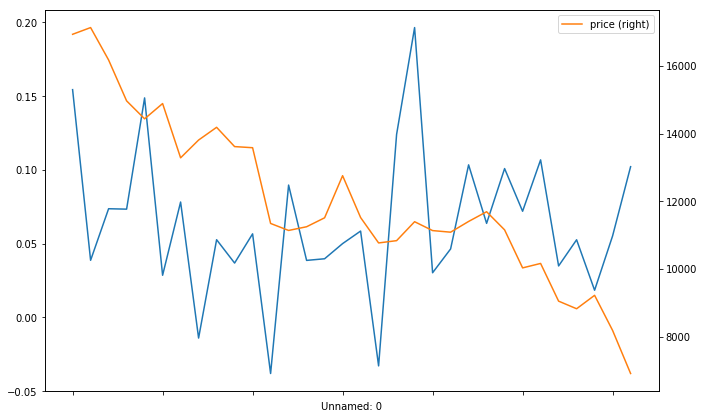

In [12]:
sentiment = sentimentdata.mean(axis=1).plot()
combined = pricedata.plot(ax=sentiment, secondary_y=True, figsize=(11, 7))

In [13]:
sentimentmeans = sentimentdata.mean(axis=1)
sentimentmeans.describe()

count    32.000000
mean      0.063771
std       0.050345
min      -0.038053
25%       0.038182
50%       0.055942
75%       0.092492
max       0.196479
dtype: float64

This simple comparision doesn't yield much insight - here we see no clear correlation between sentiment and Bitcoin prices.

Something to strongly consider is finding more features. Perhaps we can also scrape likes on posts, using those to weigh importance. Or we could pull headlines from news sites, blogs, or any other online community focused on Bitcoin. It would be difficult to perform any more analysis without more data or more advanced techniques.